# Análisis de datos - Dr. Jorge Velázquez Castro

## Proyecto 1: Estadística Descriptiva

## Francisco Valentín Valerio López

### Introducción
En los últimos años, se ha propagado una enfermedad de las plantas de cítricos a nivel mundial. La enfermedad se conoce como *dragón amarillo* y es generada por una bacteria que la transmite un psilido procedente de la región asiática llamado Diaphorina.

Esta enfermedad reduce la producción de cítricos, además de que reduce su tamaño. México no está exento de este problema. Para estimar la magnitud, ubicación y posible propagación geográfica del problema, se colocan trampas de Diaphorinas en los plantíos. En el archivo llamado "`capturas_2015-2020.xls`" está el monitoreo de dichas trampas desde 2015 hasta 2020.

<div>
<img src = "src\hlb.jpg", width = "640" height = "480" align = "center"/>
<img src = "src\diaph.jpg", width = "640" height = "480" align = "center"/>
</div>


Un indicador de la dispersión es el índice de dispersión ($Id$ ) dado por:

$$ Id = \frac{\sigma^2}{\bar{x}} \tag{1}$$

donde $\sigma^2$ es la varianza de la muestra y $\bar{x}$ es la media muestral. Es importante notar que los datos de donde se obtiene $\sigma$ y $\bar{x}$ son los correspondientes a cada ubicación geográfica (trampa) y no a a cada toma de la muestra. Es decir, es necesario primero obtener el promedio temporal de Diaphorinas por ubicación (trampa o municipio) y posteriormente se podrá calcular el índica con estos datos por ubicación. 
Los valores $Id = 1$ indican una disposición espacial aleatoria, si $Id < 1$, entonces se muestra una disposición espacial regular o uniforme, y finalmente los valores $Id >> 1$ indican una disposición agregada.

El coeficiente de Green ($C_x$) es otra métrica para evaluar la agregación o uniformidad de una distribución y está dado por:

$$ C_x = \frac{(\sigma^2 / \bar{x})-1}{\sum x - 1} \tag{2} $$

Si $C_x < 0$ entonces hay un patrón uniforme, si $C_x > 0$ entonces hay un patrón de agregación y si $C_x = 0$ entonces hay una distribución aleatoria.

### Problema

1. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017 y 2020. Es decir, una gráfica por cada año donde en el eje horizontal esté el mes y en el vertical el promedio de Diaphorinas por trampa.

2. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

3. Hacer una tabla donde la primera columna sea el mes, la segunda el índice $Id$ (por trampa) y la tercera el índice $C_x$ para el año 2015.

4. Hacer una gráfica del índice $Id$ (por trampa) como función del mes que abarque desde 2015 hasta 2020.

5. Hacer una gráfica del centro de masa de las Diaphorinas como función del mes que abarque desde 2017 hasta 2020. Nota: $CM = \text{pos} \cdot \text{Diaph} / N_{\text{trampas}}$, donde $CM$ es el centro de masa, pos es la posición de la trampa, Diaph es el promedio de Diaphorinas en la trampa y $N_{\text{trampas}}$ es el número de trampas que se consideraron en el cálculo.

### Solución:

#### 1. Vamos a importar las bibliotecas necesarias

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

*Nota*: Para poder leer el archivo de Excel, es necesario instalar la dependencia `openpyxl` debido a cuestiones de compatibilidad con versiones de MS Excel 2010, el siguiente comando lo instala:

In [2]:
# pip install openpyxl

Vamos a importar los datos, Pandas tiene una función para leer archivos de Excel directamente. 

Es importante comentar que el archivo viene dividido por hojas de cálculo, cada una representa un año desde 2015 hasta 2020, la función `pd.read_excel()` nos permite leer el archivo .xlsx, y el parámetro `sheet_name` nos permite escoger la hoja. Por simplicidad, extraeremos cada uno de los años y los manejaremos como dataframes individuales. 

### Nota:
*En el archivo .xlsx una de hay 2 hojas de cálculo correspondientes al año 2016. Como no hay diferencias aparentes, se considerará sólo la primera hoja para el 2016.

In [3]:
datos_2015 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=0)

Visualizamos la dataframe para los datos del 2015:

In [4]:
datos_2015.head()

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,0.0,1.0,0.0,1.0,4.0
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,1.0,1.0,0.0,1.0,5.0
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,0.0,1.0,0.0,1.0,4.0
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0


Ahora, podemos importar las demás hojas de cálculo para los años restantes.

In [5]:
datos_2016 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 1)
datos_2017 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 3)
datos_2018 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 4)
datos_2019 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 5)
datos_2020 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 6)

Exploremos rápidamente el contenido de las tablas de los años siguientes:

In [6]:
datos_2016.head()

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2016-01-04,23.31379,-98.95510,177_THUE05-28-019-0030T15,LLERA,EJIDO_PEDRO_JOSE_MENDEZ,MANCILLA_ZEFERINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
1,2016-01-04,23.27431,-98.86220,177_THUE05-28-019-0089T03,LLERA,EJIDO_COMPUERTAS,VARGAS_OSCAR,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
2,2016-01-04,23.31596,-98.95559,177_THUE05-28-019-0030T05,LLERA,EJIDO_PEDRO_JOSE_MENDEZ,MANCILLA_ZEFERINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
3,2016-01-04,23.27890,-98.87410,177_THUE05-28-019-0098T03,LLERA,EJIDO_COMPUERTAS,VAZQUEZ_CAMACHO_PAULINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
4,2016-01-04,23.27791,-98.87282,177_THUE05-28-019-0098T06,LLERA,EJIDO_COMPUERTAS,VAZQUEZ_CAMACHO_PAULINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1


In [7]:
datos_2017.head()

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2017-05-24,23.88426,-99.19092,177_THUE05-28-041-0143T02,VICTORIA,HUERTA SANTA FE,SILVIA MONTELONGO CANO,NARANJA,FRUCTIFICACIÓN,0.0,0,1,0,5,21
1,2017-05-10,23.88426,-99.19092,177_THUE05-28-041-0143T02,VICTORIA,HUERTA SANTA FE,SILVIA MONTELONGO CANO,NARANJA,FRUCTIFICACIÓN,0.0,0,1,0,5,19
2,2017-06-07,23.88426,-99.19092,177_THUE05-28-041-0143T02,VICTORIA,HUERTA SANTA FE,SILVIA MONTELONGO CANO,NARANJA,FRUCTIFICACIÓN,0.0,0,1,3,6,23
3,2017-04-12,23.88426,-99.19092,177_THUE05-28-041-0143T02,VICTORIA,HUERTA SANTA FE,SILVIA MONTELONGO CANO,NARANJA,FRUCTIFICACIÓN,0.0,0,1,0,4,15
4,2017-01-18,23.88426,-99.19092,177_THUE05-28-041-0143T02,VICTORIA,HUERTA SANTA FE,SILVIA MONTELONGO CANO,NARANJA,DORMANCIA,0.0,0,1,0,1,3


In [8]:
datos_2018.head()

,fecha,ano,semana,name_thue,latitud,longitud,fenologia,Revisada,captura,campo,superficie
0,2018-01-03,2018,1,177_THUE05-28-013-0639T001,23.920757,-99.108700,FRUCTIFICACION,Si,0.0,HUERTA SANTA MARTHA,26.0
1,2018-01-03,2018,1,177_THUE05-28-013-0639T002,23.920738,-99.108536,FRUCTIFICACION,Si,0.0,HUERTA SANTA MARTHA,0.0
2,2018-01-03,2018,1,177_THUE05-28-013-0639T003,23.920712,-99.108370,FRUCTIFICACION,Si,0.0,HUERTA SANTA MARTHA,0.0
3,2018-01-03,2018,1,177_THUE05-28-013-0639T004,23.920694,-99.108220,FRUCTIFICACION,Si,0.0,HUERTA SANTA MARTHA,0.0
4,2018-01-03,2018,1,177_THUE05-28-013-0639T005,23.920660,-99.108055,FRUCTIFICACION,Si,0.0,HUERTA SANTA MARTHA,0.0


In [9]:
datos_2019.head()

,Fecha,Ubicacion,Latitud,Longitud,Productor,Municipio,Localidad,Cultivo,Superficie,NoTrampasInst,...,Adultos_Brote_2,Ninfas_Brote_2,Fenologia_Brote_3,Adultos_Brote_3,Ninfas_Brote_3,Fenologia_Brote_4,Adultos_Brote_4,Ninfas_Brote_4,Mes,Semana
0,16/01/2019,THUE05/28-019/2953T06,23.29010,-98.86182,ONESIMO OLVERA ZUÑIGA,LLERA,EJIDO COMPUERTAS,NARANJA,0.0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1,3
1,13/02/2019,THUE05/28-019/2953T09,23.28970,-98.86197,ONESIMO OLVERA ZUÑIGA,LLERA,EJIDO COMPUERTAS,NARANJA,0.0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,2,7
2,13/02/2019,THUE05/28-019/2953T02,23.29060,-98.86144,ONESIMO OLVERA ZUÑIGA,LLERA,EJIDO COMPUERTAS,NARANJA,0.0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,2,7
3,13/02/2019,THUE05/28-019/2953T15,23.28952,-98.86261,ONESIMO OLVERA ZUÑIGA,LLERA,EJIDO COMPUERTAS,NARANJA,0.0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,2,7
4,13/02/2019,THUE05/28-019/2953T10,23.28956,-98.86204,ONESIMO OLVERA ZUÑIGA,LLERA,EJIDO COMPUERTAS,NARANJA,0.0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,2,7


In [10]:
datos_2020.head()

,Fecha,Ubicacion,Latitud,Longitud,Productor,Municipio,Localidad,Cultivo,Variedad,noProductores,...,Ninfas_Brote_2,Fenologia_Brote_3,Adultos_Brote_3,Ninfas_Brote_3,Fenologia_Brote_4,Adultos_Brote_4,Ninfas_Brote_4,Mes,Semana,Tecnico
0,02/01/2020,THUE05/28-019/2974T06,23.25613,-98.82374,PALMIRA CASTRO ALVAREZ,LLERA,EJIDO JOSE SILVA SANCHEZ.,NARANJA,VALENCIA,1,...,0,V6,0,0,V5,0,0,1,1,GERARDO GUEVARA SANCHEZ
1,16/01/2020,THUE05/28-019/2974T06,23.25613,-98.82374,PALMIRA CASTRO ALVAREZ,LLERA,EJIDO JOSE SILVA SANCHEZ.,NARANJA,VALENCIA,1,...,0,V5,0,0,V4,0,0,1,3,GERARDO GUEVARA SANCHEZ
2,02/01/2020,THUE05/28-019/2974T11,23.25575,-98.82317,PALMIRA CASTRO ALVAREZ,LLERA,EJIDO JOSE SILVA SANCHEZ.,NARANJA,VALENCIA,1,...,0,V6,1,0,V5,1,0,1,1,GERARDO GUEVARA SANCHEZ
3,16/01/2020,THUE05/28-019/2974T02,23.25653,-98.82423,PALMIRA CASTRO ALVAREZ,LLERA,EJIDO JOSE SILVA SANCHEZ.,NARANJA,VALENCIA,1,...,0,V5,0,0,V4,0,0,1,3,GERARDO GUEVARA SANCHEZ
4,16/01/2020,THUE05/28-019/2974T17,23.25618,-98.82309,PALMIRA CASTRO ALVAREZ,LLERA,EJIDO JOSE SILVA SANCHEZ.,NARANJA,VALENCIA,1,...,0,V5,0,0,V5,1,0,1,3,GERARDO GUEVARA SANCHEZ


Notamos que para la dataframe `datos_2018` la información está estructurada de manera distinta a todas las demás, así que habrá que tener cuidado al momento de manejar su información.

También podemos obtener información de cada una de las tablas, pero para ejemplificar, lo haremos sólo para el año 2015.

In [11]:
datos_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421360 entries, 0 to 421359
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Fecha                  384663 non-null  datetime64[ns]
 1   Latitud                384663 non-null  float64       
 2   Longitud               384663 non-null  float64       
 3   Ubicacion              384663 non-null  object        
 4   Municipio              384663 non-null  object        
 5   Comunidad              384663 non-null  object        
 6   Productor              384663 non-null  object        
 7   Cultivo                384663 non-null  object        
 8   Fenologia              384663 non-null  object        
 9   Superficie_ha          384663 non-null  float64       
 10  No_Trampas_Instaladas  384663 non-null  float64       
 11  No_Trampas_Revisadas   384663 non-null  float64       
 12  No_DiaphorinasXtrampa  384663 non-null  floa

Recordemos que primero queremos obtener una gráfica que muestre el promedio de diaphorinas detectadas en las trampas para cada mes de los años 2015, 2017 y 2020. Así que la variable de interés está en la columna `No_DiaphorinasXtrampa`. 

Podemos utilizar `groupby` para agrupar por `Mes` y después aplicar una función que calcule el promedio de diaphorinas, usaremos `agg` 

In [12]:
diaph_avg_2015 = datos_2015.groupby('Mes').agg({'No_DiaphorinasXtrampa': np.mean})

diaph_avg_2015

,No_DiaphorinasXtrampa
Mes,
1.0,0.092308
2.0,0.116510
3.0,0.160865
4.0,0.105462
5.0,0.037114
6.0,0.033045
7.0,0.039220
8.0,0.114808
9.0,0.156186


Repetimos esto para los años que se soicitaron

In [13]:
diaph_avg_2017 = datos_2017.groupby('Mes').agg({'No_DiaphorinasXtrampa': np.mean})

diaph_avg_2020 = datos_2020.groupby('Mes').agg({'No_DiaphorinasXtrampa': np.mean})

KeyError: "Column(s) ['No_DiaphorinasXtrampa'] do not exist"

Parece haber un problema en el nombre de la columna de los datos para 2020, veamos qué nombres tienen:

In [15]:
datos_2020.columns

Index(['Fecha', 'Ubicacion', 'Latitud', 'Longitud', 'Productor', 'Municipio',
       'Localidad', 'Cultivo', 'Variedad', 'noProductores', 'Superficie',
       'NoTrampasInst', 'Trampas_revisadas', 'DiaphorinaXTrampa',
       'Observacion', 'Incidencia_Psilido', 'Fenologia_Brote_1',
       'Adultos_Brote_1', 'Ninfas_Brote_1', 'Fenologia_Brote_2',
       'Adultos_Brote_2', 'Ninfas_Brote_2', 'Fenologia_Brote_3',
       'Adultos_Brote_3', 'Ninfas_Brote_3', 'Fenologia_Brote_4',
       'Adultos_Brote_4', 'Ninfas_Brote_4', 'Mes', 'Semana', 'Tecnico'],
      dtype='object')

Es una diferencia muy sutil, pero debemos cambiar el nombre de la columna que queremos filtrar.

In [16]:
diaph_avg_2020 = datos_2020.groupby('Mes').agg({'DiaphorinaXTrampa': np.mean})

También notamos que los meses están asignados como números ordinales, así que opcionalmente podemos cambiarles el nombre para que tengan un poco más de sentido al graficar. 

In [18]:
diaph_avg_2015.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
                        'Noviembre', 'Diciembre'], axis = 0)

diaph_avg_2017.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
                        'Noviembre', 'Diciembre'], axis = 0)

diaph_avg_2020.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
                        'Noviembre', 'Diciembre'], axis = 0)

,DiaphorinaXTrampa
Enero,0.378565
Febrero,0.750304
Marzo,0.502849
Abril,0.446075
Mayo,0.249759
Junio,0.212220
Julio,0.305785
Agosto,0.289525
Septiembre,0.191505
Octubre,0.189819


Ahora graficamos cada una de las tablas obtenidas, lo haremos utilizando gráficos de barra en vez de una línea continua, ya que tendrá una mayor representación visual la distribución de las detecciones de Diaphorinas cada mes.

<AxesSubplot: title={'center': 'Diaphorinas por trampa (2015)'}>

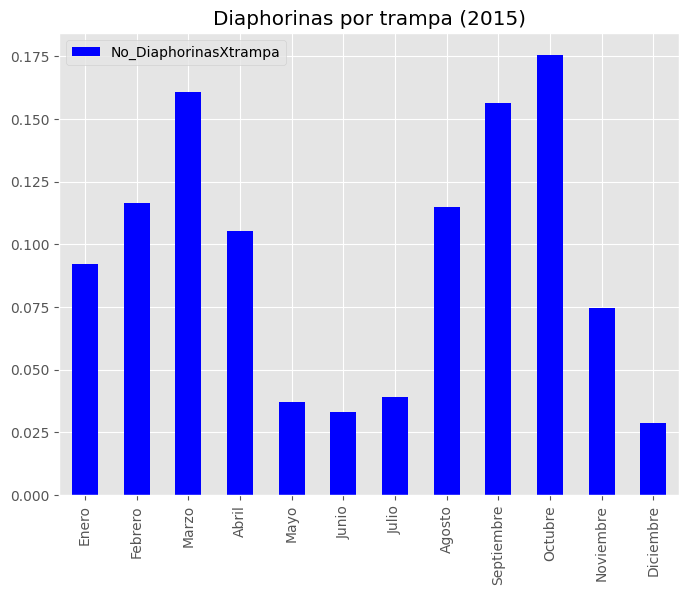

In [20]:
diaph_avg_2015.plot.bar(figsize = (8,6), title = 'Diaphorinas por trampa (2015)', color = 'blue')

<AxesSubplot: title={'center': 'Diaphorinas por trampa (2017)'}>

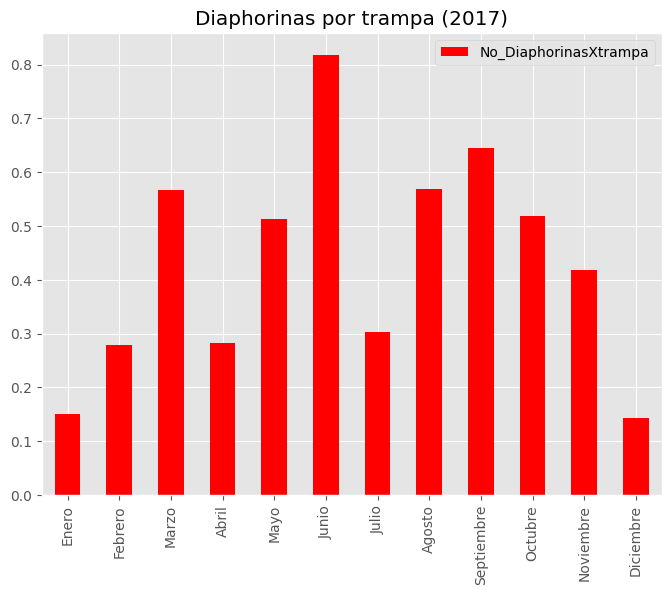

In [21]:
diaph_avg_2017.plot.bar(figsize = (8,6), title = 'Diaphorinas por trampa (2017)', color = 'red')

<AxesSubplot: title={'center': 'Diaphorinas por trampa (2020)'}>

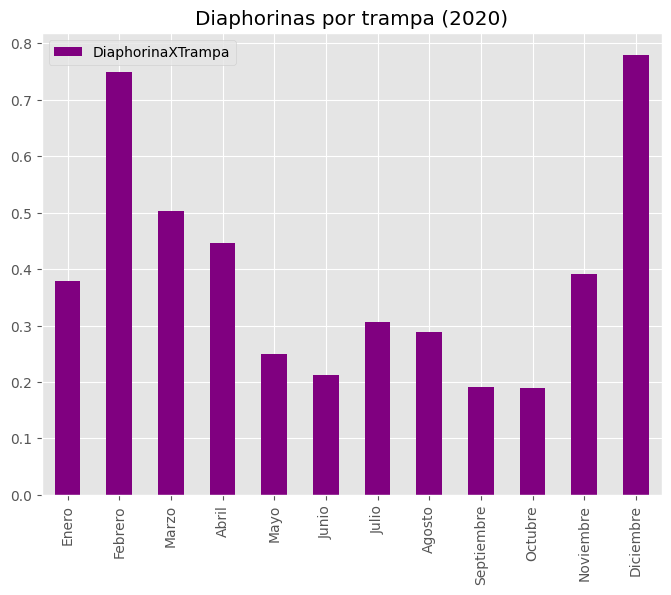

In [23]:
diaph_avg_2020.plot.bar(figsize = (8,6), title = 'Diaphorinas por trampa (2020)', color = 'purple')

Como comentario: Es interesante observar que se registraron mayor número de Diaphorinas en las trampas durante los meses de enero a abril, en el caso de los años 2015 y 2020, después hay una marcada disminución durante los meses siguientes y a partir de octubre-noviembre vuelven a tener mayor número de detección. Eso podría sugerir una distribución temporal, pero son muy pocos datos como para asegurarlo.

#### 2. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

Para completar este ejercicio, podemos volver a utilizar `groupby` para agrupar los datos del año 2020 por mes y también por municipio. Para hacer que la función no nos arroje errores nos conviene revisar primero los nombres de las columnas para saber a quiénes llamar:

In [24]:
datos_2020.columns

Index(['Fecha', 'Ubicacion', 'Latitud', 'Longitud', 'Productor', 'Municipio',
       'Localidad', 'Cultivo', 'Variedad', 'noProductores', 'Superficie',
       'NoTrampasInst', 'Trampas_revisadas', 'DiaphorinaXTrampa',
       'Observacion', 'Incidencia_Psilido', 'Fenologia_Brote_1',
       'Adultos_Brote_1', 'Ninfas_Brote_1', 'Fenologia_Brote_2',
       'Adultos_Brote_2', 'Ninfas_Brote_2', 'Fenologia_Brote_3',
       'Adultos_Brote_3', 'Ninfas_Brote_3', 'Fenologia_Brote_4',
       'Adultos_Brote_4', 'Ninfas_Brote_4', 'Mes', 'Semana', 'Tecnico'],
      dtype='object')

También podemos conocer todos los posibles valores que aparecen en una columna, utilizando el método `pd.unique`.

In [26]:
datos_2020.Municipio.unique()

array(['LLERA', 'HIDALGO', 'GUEMEZ', 'PADILLA', 'VICTORIA'], dtype=object)

Y de la misma forma que en el punto anterior, una vez agrupados imponemos una función de agregación que calcule el promedio en la columna Diaphorinas. 

Es importante notar que importa el orden del nombre de las columnas, al ser índices jerárquicos Pandas realizará la organización en el orden que le indiquemos.

In [31]:
diaph_avg_2020_municipios = datos_2020.groupby(['Municipio', 'Mes']).agg({'DiaphorinaXTrampa': np.mean})

diaph_avg_2020_municipios

DiaphorinaXTrampa
Municipio Mes                   
GUEMEZ    1             0.408345
          2             0.785759
          3             0.630379
          4             0.513235
          5             0.295492
          6             0.230448
          7             0.007463
          8             0.160682
          9             0.209453
          10            0.273210
          11            0.425111
          12            0.822393
HIDALGO   1             0.218427
          2             0.791475
          3             0.603687
          4             0.210767
          5             0.228637
          6             0.249655
          7             0.360882
          8             0.255043
          9             0.173432
          10            0.132941
          11            0.272418
          12            0.418440
LLERA     1             0.575518
          2             1.302721
          3             0.707447
          4             0.386850
          5             0.320827
          6             0.247656
          7                  NaN
          8             0.434690
          9             0.349813
          10            0.332610
          11            0.731200
          12            1.585185
PADILLA   1             0.077373
          2             0.326296
          3             0.175463
          4             0.305161
          5             0.112924
          6             0.141002
          7             0.821962
          8             0.135866
          9             0.050822
          10            0.015918
          11            0.203060
          12            0.323619
VICTORIA  1             0.908224
          2             0.906367
          3             0.550000
          4             0.966667
          5             0.242308
          6             0.201923
          7             0.079812
          8             0.745718
          9             0.301676
          10            0.136905
          11            0.370679
          12            0.696697

Seleccionamos el municipio de `VICTORIA` para graficar:

<AxesSubplot: title={'center': 'Promedio de Diaphorinas (2020) en Victoria, Tamaulipas'}, xlabel='Mes'>

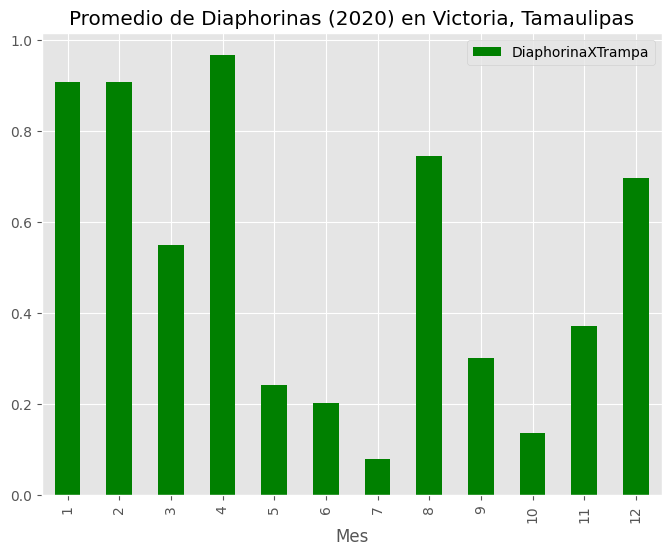

In [29]:
diaph_avg_2020_municipios.loc['VICTORIA'].plot.bar(figsize = (8,6), title = 'Promedio de Diaphorinas (2020) en Victoria, Tamaulipas', color = 'green')

#### 3. Hacer una tabla donde la primera columna sea el mes, la segunda el índice $Id$ (por trampa) y la tercera el índice $C_x$ para el año 2015.

Recordemos que tanto el índice $Id$ como el coeficiente $C_x$ están definidos en las expresiones (1) y (2). Primero debemos preprarar los datos, nos enfocaremos en la dataframe del año 2015, `datos_2015`. 

Lo primero que debemos hacer es verificar si la dataframe tiene valores `NaN`, ya que como vamos a hacer operaciones entre las filas, queremos evitar errores y advertencias. Podemos verificarlo y además contar cuántos valores `Nan` hay en una columna con el siguiente comando:

In [33]:
datos_2015['No_DiaphorinasXtrampa'].isnull().sum()

36697

Tenemos casi 37 mil valores nulos en la columna del número de Diaphorinas por trampa. Queremos removerlos, así que utilizamos el método `dropna`, indicando que sólo queremos que remueva los que estén en la columna `No_DiaphorinasXtrampa` con `subset`.

In [35]:
datos_2015_filtrados = datos_2015.dropna(subset = ['No_DiaphorinasXtrampa'])

También, considerando las definiciones (1) y (2), si $\bar{x} = 0$, tendríamos división entre 0.

Filtramos entonces también esa columna, para que tengamos únicamente los valores distintos a 0.

datos_2015_filtrados = datos_2015_filtrados[datos_2015_filtrados['No_DiaphorinasXtrampa'] != 0]

Finalmente, verificamos cuántos valores nulos tenemos para comprobar que funcionaron los filtros:

In [38]:
datos_2015_filtrados['No_DiaphorinasXtrampa'].isnull().sum()

0

Recordemos que el objetivo es el construir una nueva tabla, donde los atributos sean el mes, después el índice $Id$ y la última columna el índice $C_x$, para cada una de las trampas.

La columna `Ubicacion` nos da información sobre cada una de la trampas individuales, ya que están etiquetadas con una clave específica. Eso nos sugiere que podemos agrupar en índices multinivel, empezando por esa columna.

In [50]:
trampas = datos_2015_filtrados.groupby(['Ubicacion', 'Mes']).agg({'No_DiaphorinasXtrampa': sum})

In [51]:
trampas

No_DiaphorinasXtrampa
Ubicacion                 Mes                        
177_THUE05-28-011-0001T01 9.0                     1.0
177_THUE05-28-011-0001T02 6.0                     1.0
                          8.0                     1.0
                          10.0                    3.0
                          11.0                    2.0
...                                               ...
177_THUE05-28-08-0002T16  11.0                    2.0
177_THUE05-28-08-0002T17  6.0                     3.0
                          8.0                     2.0
                          10.0                    3.0
                          11.0                    2.0

[11761 rows x 1 columns]

In [52]:
trampas['Indice_Id'] = trampas['No_DiaphorinasXtrampa'].apply(lambda x: np.var(x)**2 / np.mean(x))

trampas['Cx'] = trampas['No_DiaphorinasXtrampa'].apply(lambda x: ((np.var(x)**2 /np.mean(x)) -1)/(np.sum(x)-1))


In [53]:
trampas

No_DiaphorinasXtrampa  Indice_Id   Cx
Ubicacion                 Mes                                        
177_THUE05-28-011-0001T01 9.0                     1.0        0.0 -inf
177_THUE05-28-011-0001T02 6.0                     1.0        0.0 -inf
                          8.0                     1.0        0.0 -inf
                          10.0                    3.0        0.0 -0.5
                          11.0                    2.0        0.0 -1.0
...                                               ...        ...  ...
177_THUE05-28-08-0002T16  11.0                    2.0        0.0 -1.0
177_THUE05-28-08-0002T17  6.0                     3.0        0.0 -0.5
                          8.0                     2.0        0.0 -1.0
                          10.0                    3.0        0.0 -0.5
                          11.0                    2.0        0.0 -1.0

[11761 rows x 3 columns]